In [15]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt 
import geograpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textaugment import EDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from nltk.tokenize import word_tokenize
import os
import pickle
from nltk.stem.snowball import SnowballStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import gensim
import pickle
DATAPATH = "C://Users//Anand.INFRRDAD//Downloads//Datasets//NLP Disaster tweet//"
TEMP_DF = "TEMP_DF.csv"

In [84]:
data_train = pd.read_csv("C://Users//Anand.INFRRDAD//Downloads//Datasets//NLP Disaster tweet//train.csv") #Read the data

In [85]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [87]:
data_train.isnull().sum() #Check for null values

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [88]:

max_words = 4000
tokenizer_file = 'tokenizer.pickle'

In [89]:
#import and create an EDA example
from textaugment import EDA
t = EDA()


In [90]:
#check for a place in each tweet and populate the location.
location_list=data_train["location"].unique() #list of all the locations in the location feature
def fill_location(sentence):
    words=sentence.split()
    location = [ loc for loc in location_list if loc in words ] #check if the tweet contains a location already present in location feature
    try:
        location=location[0]
    except:
       # location=np.nan
        places = geograpy.get_place_context(text=sentence) #check for any location in the tweet            
        countries =places.countries
        cities=places.cities
        if not countries:
            if not cities:
                location='loc'
                #print(sentence)
            else:
                location=cities[0]
                print("city found: ",location)
        else:
            location=countries[0]
            print("country found: ",location)
        if "?" in location:
            location='loc'
    return location
possible_locations = pd.DataFrame(columns = ['location']) 
possible_locations["location"]=data_train['text'].apply(fill_location)
data_train["location"].fillna(possible_locations["location"], inplace=True)#fill nan
data_train.isnull().sum()

country found:  United States
country found:  Argentina
country found:  Philippines
country found:  Nigeria
country found:  Australia
country found:  Australia
country found:  Costa Rica
country found:  France
country found:  United States
country found:  Bahamas
country found:  South Africa
country found:  United States
country found:  United States
country found:  Bahrain
country found:  United States
country found:  Mexico
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  Lesotho
country found:  Canada
country found:  Slovenia
country found:  United States
country found:  United States
country found:  Norway
country found:  United States
country found:  Hungary
country found:  Egypt
country found:  Switzerland
country found:  Russian Federation
country found:  Hungary
country found:  Canada
country found:  Israel
country found:  United Kingdom
country found:  Portugal
country found:  Switzerland
co

country found:  Belarus
country found:  United States
country found:  United Kingdom
country found:  United States
country found:  Nigeria
country found:  United States
country found:  Australia
country found:  India
country found:  United Kingdom
country found:  India
country found:  Australia
country found:  Australia
country found:  Finland
country found:  India
country found:  Australia
country found:  India
country found:  Australia
country found:  United States
country found:  Switzerland
country found:  South Africa
country found:  Hungary
country found:  Hungary
country found:  United States
country found:  South Africa
country found:  Switzerland
country found:  United States
country found:  Netherlands
country found:  United States
country found:  United States
country found:  United States
country found:  Svalbard and Jan Mayen
country found:  Gambia
country found:  United States
country found:  United States
country found:  Nigeria
country found:  Nigeria
country found:  Un

country found:  Belgium
country found:  Hungary
country found:  United States
country found:  Brazil
country found:  South Africa
country found:  Brazil
country found:  Australia
country found:  United States
country found:  Australia
country found:  South Africa
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  Mauritius
country found:  Australia
country found:  United States
country found:  Spain
country found:  Montserrat
country found:  China
country found:  United States
country found:  Australia
country found:  Pakistan
country found:  Netherlands
country found:  United Kingdom
country found:  Canada
country found:  United States
country found:  United Kingdom
country found:  United Kingdom
country found:  South Africa
country found:  United States
country found:  Nigeria
country found:  Nigeria
country fou

country found:  Turkey
country found:  Iraq
country found:  Philippines
country found:  Israel
country found:  Kuwait
country found:  Turkey
country found:  Hungary
country found:  Switzerland
country found:  Switzerland
country found:  Netherlands
country found:  Japan
country found:  Germany
country found:  Japan
country found:  Netherlands
country found:  India
country found:  Japan
country found:  Japan
country found:  Japan
country found:  United States
country found:  United States
country found:  Pakistan
country found:  United States
country found:  India
country found:  India
country found:  India
country found:  India
country found:  Pakistan
country found:  India
country found:  Palestine, State of
country found:  United States
country found:  Japan
country found:  Liberia
country found:  Netherlands
country found:  United States
country found:  Jersey
country found:  United States
country found:  United States
country found:  Canada
country found:  United States
country fou

id           0
keyword     61
location     0
text         0
target       0
dtype: int64

In [91]:
#replace all nan in keyword feature
keyword_list=data_train["keyword"].unique() #list all kewords in keyword feature
keyword_list = np.append(keyword_list, ['bomber','detonted','explosives','fires',
                                        'calamity','cataclysm','act of God','holocaust',
                                       'mishap','heat wave'])
def fill_keyword(sentence):
    words=sentence.split()
    keyword = [ key for key in keyword_list if key in words ] #check if any keword from keyword feature is present in tweet
    try:
        keyword=keyword[0]
    except:
        keyword='key'
    return keyword
possible_keywords = pd.DataFrame(columns = ['keyword']) 
possible_keywords["keyword"]=data_train['text'].apply(fill_keyword) 
data_train["keyword"].fillna(possible_keywords["keyword"], inplace=True)#fill nan

In [92]:
loc_dict={'United States':'USA','New York':'USA',"London":'UK',"Los Angeles, CA":'USA',"Washington, D.C.":'USA',
          "California":'USA',"Chicago, IL":'USA',"Chicago":'USA',"New York, NY":'USA',"California, USA":'USA',
          "FLorida":'USA',"Everywhere":'Worldwide',"San Francisco":'USA',"Florida":'USA',"United Kingdom":'UK',
          "Los Angeles":'USA',"Toronto":'Canada',"San Francisco, CA":'USA',"NYC":'USA',"Seattle":'USA',
          "Earth":'Worldwide',"Ireland":'UK',"London, England":'UK',"New York City":'USA',"Texas":'USA',
          "London, UK":'UK',"Atlanta, GA":'USA',"Mumbai":"India","US":"USA","us":"USA","U.S.":"USA","IN":"India"}

data_train['location'].replace(loc_dict,inplace=True)

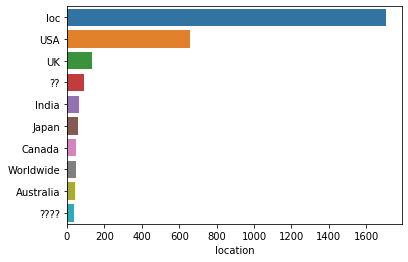

In [93]:
sns.barplot(y=data_train['location'].value_counts()[:10].index,
            x=data_train['location'].value_counts()[:10],
            orient='h');

In [94]:
key_dict={'panic':'fear','suicide bomber':'bomb','suicide bomb':'bomb',
          'suicide bombing':'bomb',"mass murder":"massacre","hurricane":"typhoon"}
data_train['keyword'].replace(key_dict,inplace=True)

In [95]:
def clean_str(txt):
    #replace and simplify a lot of signals
    txt = txt.lower()#turn to lower case
    txt = re.sub(r'http\S+', 'link', txt)
    txt = txt.replace(",000,000", "m").replace(",000","k").replace("′", "'").replace("’", "'").replace("can't", "cannot")\
             .replace("don't", "do not").replace("isn't", "is not").replace("you're", "you are").replace("you've","you have")\
             .replace("you'll", "you will").replace("that'll",'that will').replace("should've", "should have")\
             .replace("aren't", "are not").replace("couldn't", "could not").replace("didn't", "did not")\
             .replace("doesn't", "does not").replace("hadn't", "had not").replace("hasn't", "has not")\
             .replace("haven't", "have not").replace("mustn't", "must not").replace("wasn't", "was not")\
             .replace("i'm", "i am").replace("he's", "he is").replace("she's", "she is").replace("ain't", "am not")\
             .replace("%", " ").replace("₹", " rupee ").replace("$", " dollar ").replace("€", " euro ")\
             .replace("'ll", " will").replace("'ve", " have").replace("it's", "it is")
    
    txt = re.sub('[^A-Za-z]+', ' ', txt) #removing html tags
    txt = re.sub('[?|!|\'|"|#]','',txt) #removing punctuations
    txt = re.sub('[.|,|)|(|\|/]','',txt) #removing punctuations
    
    return txt

In [96]:
cleaned_str=clean_str("Horrible Accident | Man Died In Wings of AirplaneåÊ(29-07-2015) http://t.co/wq3wJsgPHL")
data_train['text'] = data_train['text'].apply(clean_str)
data_train['keyword'] = data_train['keyword'].apply(clean_str)
data_train['location'] = data_train['location'].apply(clean_str)
cleaned_str

'horrible accident man died in wings of airplane link'

In [97]:
data_train.head()

,id,keyword,location,text,target
0,1,key,usa,our deeds are the reason of this earthquake ma...,1
1,4,fire,canada,forest fire near la ronge sask canada,1
2,5,evacuation,loc,all residents asked to shelter in place are be...,1
3,6,evacuation,usa,k people receive wildfires evacuation orders ...,1
4,7,smoke,usa,just got sent this photo from ruby alaska as s...,1


In [98]:
data_train[data_train['location']==" "] ['location'].replace('loc',inplace=True)
data_train[data_train['location']==" "] ['location']

43       
80       
90       
103      
105      
       ..
7499     
7561     
7564     
7594     
7602     
Name: location, Length: 270, dtype: object

In [99]:
data_raw_non_Disaster = data_train[data_train['target'] == 0]
data_raw_Disaster = data_train[data_train['target'] == 1]

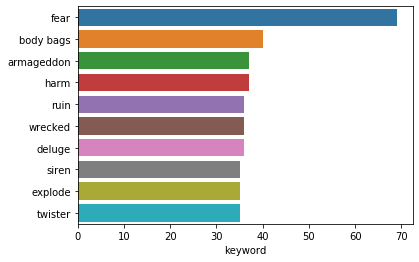

In [100]:
sns.barplot(y=data_raw_non_Disaster['keyword'].value_counts()[:10].index,
            x=data_raw_non_Disaster['keyword'].value_counts()[:10],
            orient='h');

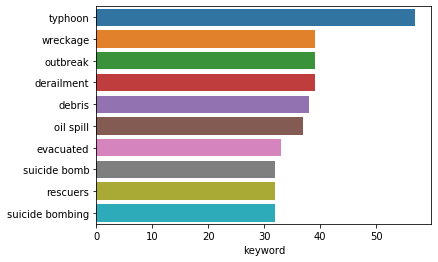

In [101]:
sns.barplot(y=data_raw_Disaster['keyword'].value_counts()[:10].index,
            x=data_raw_Disaster['keyword'].value_counts()[:10],
            orient='h');

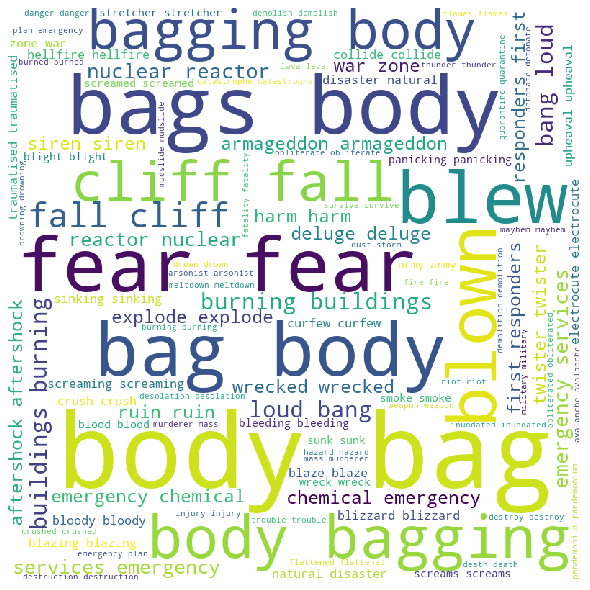

In [102]:
words = '' 
for val in data_raw_non_Disaster["keyword"]:
     val = str(val) 
  
    # split the value 
     tokens = val.split() 
      
    # Converts each token into lowercase 
     for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
        words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

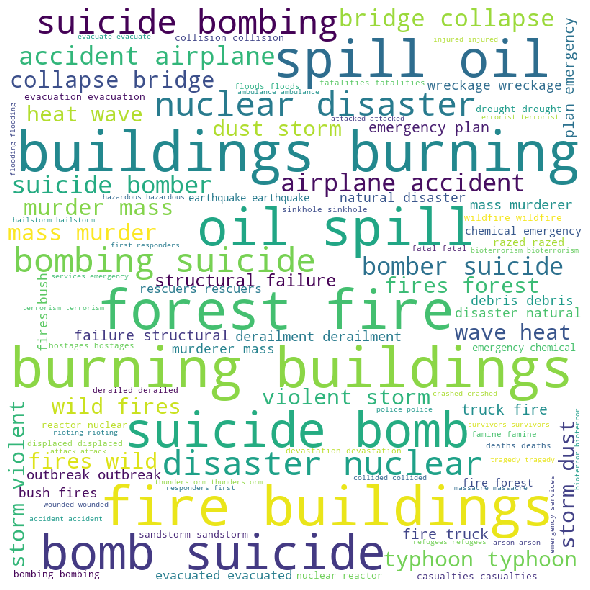

In [103]:
words = '' 
for val in data_raw_Disaster["keyword"]:
     val = str(val) 
  
    # split the value 
     tokens = val.split() 
      
    # Converts each token into lowercase 
     for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
        words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

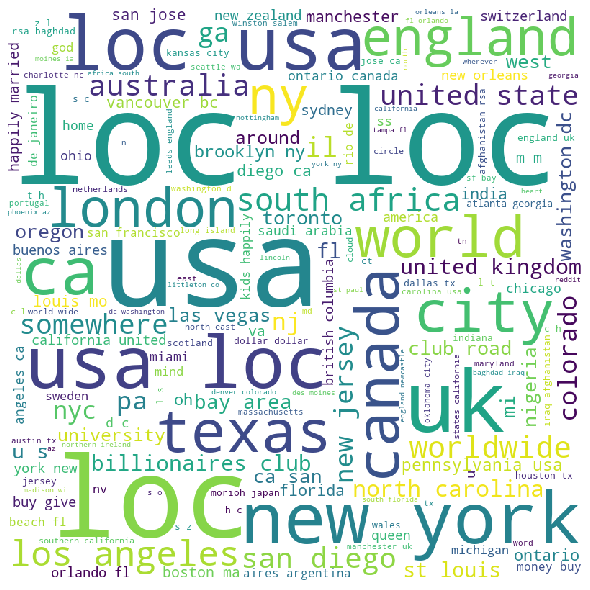

In [104]:
words = '' 
for val in data_raw_non_Disaster["location"]:
     val = str(val) 
  
    # split the value 
     tokens = val.split() 
      
    # Converts each token into lowercase 
     for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
        words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

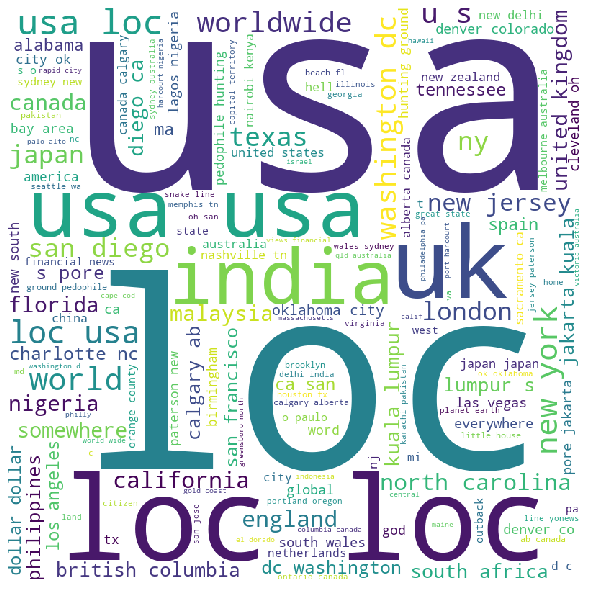

In [105]:
words = '' 
for val in data_raw_Disaster["location"]:
     val = str(val) 
  
    # split the value 
     tokens = val.split() 
      
    # Converts each token into lowercase 
     for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
        words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [106]:
data_train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [107]:
#balance data with equal no of disaster and non disaster tweets
data_raw_non_Disaster = data_train[data_train['target'] == 0]
data_raw_Disaster = data_train[data_train['target'] == 1]
diff=len(data_raw_non_Disaster)-len(data_raw_Disaster)    
data_sample=data_raw_Disaster.sample(round(diff/2),axis=0)
data_sample.shape

(536, 5)

In [108]:
temp_df = pd.DataFrame ( columns = data_train.columns)

#sequences = []
#targets = []

for index, row in data_sample.iterrows():
    seqs = []
    text = row['text']
    id=row['id']
    keyword=row['keyword']
    location=row['location']
    target=row['target']

    # if empty text, skipping to next row data
    if not text:
        continue

   # seqs.append(text)
    #temp_df.loc[len(temp_df.index)] = [id, keyword, location,text,target] 
    # apply data augmentation
    
    # random deletion
    seq2 = t.random_deletion(text, p=0.2)
    if type(seq2) == type([]):
        #seqs.append(seq2[0])
        temp_df.loc[len(temp_df.index)] = [id, keyword, location,seq2[0],target]
    else:
        #seqs.append(seq2)
        temp_df.loc[len(temp_df.index)] = [id, keyword, location,seq2,target]
        # random swap
    #if len(text) > 1:
      #  seq3=t.random_swap(text)
        #seqs.append(seq3)
      #  temp_df.loc[len(temp_df.index)] = [id, keyword, location,seq3,target]
    # synonym replacement and random insertion
    for i in range(2):
        seq4=t.synonym_replacement(text)
        #seqs.append(seq4) 
        temp_df.loc[len(temp_df.index)] = [id, keyword, location,seq4,target]
       # try:
         #   seq5=t.random_insertion(text)
         #   temp_df.loc[len(temp_df.index)] = [id, keyword, location,seq5,target]
            #seqs.append(seq5)
       # except:
         #   pass

In [109]:
data_train=pd.concat([data_train, temp_df],ignore_index=True)

data_raw_non_Disaster = data_train[data_train['target'] == 0]
data_raw_Disaster = data_train[data_train['target'] == 1]
print("Non Disatser Shape = "+str(data_raw_non_Disaster.shape))
print("Disaster Shape = "+str(data_raw_Disaster.shape))

Non Disatser Shape = (4342, 5)
Disaster Shape = (4879, 5)


In [110]:
length=len(data_raw_non_Disaster.index)
totalFrame = [data_raw_non_Disaster, data_raw_Disaster[:length]] #balanced dataframe
data_new = pd.concat(totalFrame)
data_new.sort_values('id', axis=0, ascending=True, inplace=True)
data_new.reset_index(drop = True, inplace = True)
data_new.to_csv(os.path.join(DATAPATH, TEMP_DF), index = False)
data_train = pd.read_csv(os.path.join(DATAPATH, TEMP_DF))
data_train.head()

,id,keyword,location,text,target
0,1,key,usa,our deeds are the reason of this earthquake ma...,1
1,4,fire,canada,forest fire near la ronge sask canada,1
2,5,evacuation,loc,all residents asked to shelter in place are be...,1
3,6,evacuation,usa,k people receive wildfires evacuation orders ...,1
4,7,smoke,usa,just got sent this photo from ruby alaska as s...,1


C:\Users\Anand.INFRRDAD\AppData\Local\Continuum\anaconda3\envs\Ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of disaster tweets')

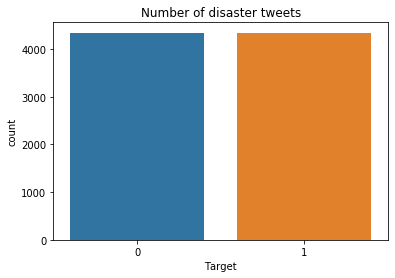

In [111]:
sns.countplot(data_train.target) #plot disaster and non disatser tweets
plt.xlabel('Target')
plt.title('Number of disaster tweets')

In [112]:
stop_words = set(stopwords.words('english'))  #stopwords for English
stemmer = SnowballStemmer("english")
def remove_stopwords(txt):
    word_list = word_tokenize(txt)
    no_stop_words = ' '.join(str(stemmer.stem(w)) for w in word_list if w not in stop_words and len(w)!=1)
    return no_stop_words

In [113]:
data_train['text'] = data_train['text'].apply(remove_stopwords)  #remove stopwords from tweet
def stem_words(w):
    return stemmer.stem(w)
data_train['keyword'] = data_train['keyword'].apply(stem_words)
data_train['location'] = data_train['location'].apply(stem_words)
data_train['text']=data_train['location']+" "+data_train['keyword']+" "+data_train['text']  #combining location, keword and text feature

In [114]:
data_train.head()

,id,keyword,location,text,target
0,1,key,usa,usa key deed reason earthquak may allah forgiv us,1
1,4,fire,canada,canada fire forest fire near la rong sask canada,1
2,5,evacu,loc,loc evacu resid ask shelter place notifi offic...,1
3,6,evacu,usa,usa evacu peopl receiv wildfir evacu order cal...,1
4,7,smoke,usa,usa smoke got sent photo rubi alaska smoke wil...,1


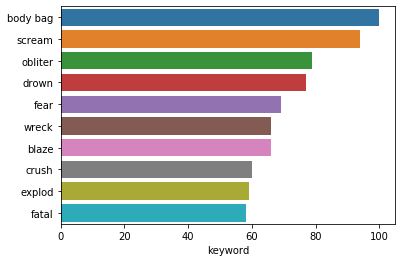

In [115]:
data_raw_non_Disaster = data_train[data_train['target'] == 0]
data_raw_Disaster = data_train[data_train['target'] == 1]
sns.barplot(y=data_raw_non_Disaster['keyword'].value_counts()[:10].index, #plot non disaster kewords
            x=data_raw_non_Disaster['keyword'].value_counts()[:10],
            orient='h');

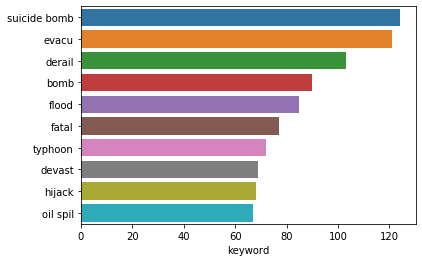

In [116]:
sns.barplot(y=data_raw_Disaster['keyword'].value_counts()[:10].index,  #plot disaster kewords
            x=data_raw_Disaster['keyword'].value_counts()[:10],
            orient='h');

In [117]:
X=data_train[['text']]
Y=data_train['target']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42) #split data for train and validation

In [118]:
# tokenizer
Text_tokenizer = Tokenizer(num_words=max_words)  
# Updates internal vocabulary based on a list of texts. 
# This method creates the vocabulary index based on word frequency. 

train_text=X_train['text'].tolist()
validation_text=X_validation['text'].tolist()
#test_text=X_test['text'].tolist()

Text_tokenizer.fit_on_texts(train_text)

# Transforms each row from texts to a sequence of integers. 
# So it basically takes each word in the text and replaces it 
train_text = Text_tokenizer.texts_to_sequences(train_text)
validation_text = Text_tokenizer.texts_to_sequences(validation_text)
#test_text = Text_tokenizer.texts_to_sequences(test_text)


# Pad sequences
train_text = pad_sequences(train_text, maxlen=40, dtype='int32', 
                                           padding='pre', truncating='pre', value=0.)
validation_text = pad_sequences(validation_text, maxlen=40, dtype='int32', 
                                           padding='pre', truncating='pre', value=0.)
#test_text = pad_sequences(test_text, maxlen=40, dtype='int32', 
                                           #padding='pre', truncating='pre', value=0.)

text_word_index = Text_tokenizer.word_index


In [119]:
#convert dataframe to array
TrainFinal_RNN=np.array(train_text)
CVFinal_RNN=np.array(validation_text)
#TestFinal_RNN=np.array(TestFinal_RNN)

TrainFinalLabels = Y_train
CVFinalLabels = Y_validation
#TestFinalLabels = Y_test

TrainFinalLabels_RNN=np.array(TrainFinalLabels)
CVFinalLabels_RNN=np.array(CVFinalLabels)
#TestFinalLabels_RNN=np.array(TestFinalLabels)


In [120]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [121]:
#LSTM model
l2_reg = l2(0.001)
max_sequence_length = 40
model_file = 'model.h5'
num_classes = 2
embedding_size = 40
from tensorflow.keras.optimizers import Adam
def model_fn():
    model = Sequential()

    model.add(Embedding(max_words, embedding_size, input_length=max_sequence_length, embeddings_regularizer=l2_reg))
    
    model.add(SpatialDropout1D(0.5))
    
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2_reg, 
                   recurrent_regularizer=l2_reg, bias_regularizer=l2_reg))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation='relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation='relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(512, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    #optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
    optimizer=Adam(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    print(model.summary())

    return model

In [122]:
#training using LSTM
epochs = 100
batch_size = 128
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=5)
model = model_fn()
history = model.fit(TrainFinal_RNN, TrainFinalLabels_RNN,
          validation_data=(CVFinal_RNN, CVFinalLabels_RNN),
          epochs=epochs,
          batch_size=batch_size,
          shuffle=True,
          verbose=1,
          callbacks=[earlyStop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 40)            160000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 40, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                26880     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)             

C:\Users\Anand.INFRRDAD\AppData\Local\Continuum\anaconda3\envs\Ml_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


6947/6947 [==============================] - 8s 1ms/sample - loss: 0.9955 - accuracy: 0.5294 - val_loss: 0.9637 - val_accuracy: 0.6442
Epoch 2/100
6947/6947 [==============================] - 5s 790us/sample - loss: 0.9228 - accuracy: 0.6242 - val_loss: 0.8549 - val_accuracy: 0.6811
Epoch 3/100
6947/6947 [==============================] - 5s 791us/sample - loss: 0.8340 - accuracy: 0.6827 - val_loss: 0.7802 - val_accuracy: 0.7283
Epoch 4/100
6947/6947 [==============================] - 5s 782us/sample - loss: 0.7633 - accuracy: 0.7400 - val_loss: 0.7086 - val_accuracy: 0.7640
Epoch 5/100
6947/6947 [==============================] - 5s 783us/sample - loss: 0.6999 - accuracy: 0.7690 - val_loss: 0.6646 - val_accuracy: 0.7893
Epoch 6/100
6947/6947 [==============================] - 5s 786us/sample - loss: 0.6493 - accuracy: 0.7937 - val_loss: 0.6367 - val_accuracy: 0.8014
Epoch 7/100
6947/6947 [==============================] - 5s 788us/sample - loss: 0.6234 - accuracy: 0.8087 - val_loss: 0

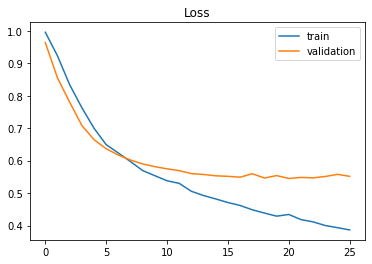

In [123]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show() #plot loss

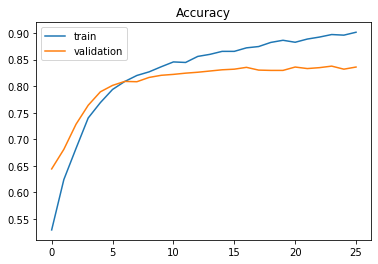

In [124]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()#plot accuracy

In [125]:
data_predict = pd.read_csv("C://Users//Anand.INFRRDAD//Downloads//Datasets//NLP Disaster tweet//test.csv")
data_predict.info()#test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [126]:
#process test data

possible__predict_keywords = pd.DataFrame(columns = ['keyword']) 
possible__predict_keywords["keyword"]=data_predict['text'].apply(fill_keyword)
data_predict["keyword"].fillna(possible__predict_keywords["keyword"], inplace=True)
data_predict['keyword'].replace(key_dict,inplace=True)

possible__predict_locations = pd.DataFrame(columns = ['location']) 
possible__predict_locations["location"]=data_predict['text'].apply(fill_location)
data_predict["location"].fillna(possible_locations["location"], inplace=True)
data_predict['location'].replace(loc_dict,inplace=True)

data_predict['text'] = data_predict['text'].apply(clean_str)
data_predict['keyword'] = data_predict['keyword'].apply(clean_str)
data_predict['location'] = data_predict['location'].apply(clean_str)

data_predict['text'] = data_predict['text'].apply(remove_stopwords)
data_predict['keyword'] = data_predict['keyword'].apply(stem_words)
data_predict['location'] = data_predict['location'].apply(stem_words)

data_predict['text']=data_predict['location']+" "+data_predict['keyword'] +" "+data_predict['text']  

predict_text=data_predict['text'].tolist()
predict_text = Text_tokenizer.texts_to_sequences(predict_text)
predict_text = pad_sequences(predict_text, maxlen=40, dtype='int32', 
                                           padding='pre', truncating='pre', value=0.)

PredictFinal_RNN=np.array(predict_text)

country found:  Mauritius
country found:  United States
country found:  Hungary
country found:  United Kingdom
country found:  United States
country found:  Belgium
country found:  United States
country found:  Japan
country found:  Japan
country found:  Mexico
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  Argentina
country found:  Pakistan
country found:  Slovenia
country found:  Turkey
country found:  United States
country found:  Switzerland
country found:  Israel
country found:  Israel
country found:  United States
country found:  United States
country found:  United States
country found:  United States
country found:  Israel
country found:  Switzerland
country found:  Australia
country found:  France
country found:  United States
country found:  India
country found:  South Africa
country found:  United States
country found:  United States
country found:  United States
country found:  United S

country found:  Argentina
country found:  Brazil
country found:  United States
country found:  Myanmar
country found:  India
country found:  United States
country found:  United Kingdom
country found:  Brazil
country found:  Canada
country found:  Germany
country found:  United States
country found:  Brazil
country found:  South Africa
country found:  Austria
country found:  United States
country found:  Australia
country found:  United States
country found:  United States
country found:  Australia
country found:  United States
country found:  Australia
country found:  Australia
country found:  Australia
country found:  Ukraine
country found:  Nigeria
country found:  Argentina
country found:  Egypt
country found:  Egypt
country found:  United States
country found:  India
country found:  Iraq
country found:  Iraq
country found:  Australia
country found:  India
country found:  Somalia
country found:  United States
country found:  Liberia
country found:  India
country found:  Germany
coun

In [127]:
predicted = model.predict(PredictFinal_RNN) #prediction

binary_predicted = np.array(predicted) >= 0.5
targets = binary_predicted.astype(int).reshape((len(binary_predicted)))
my_submission = pd.DataFrame({'id': data_predict.id, 'target': targets})
my_submission.to_csv(os.path.join(DATAPATH, 'predict_lstm.csv'), index=False)

print("Submission file created!")

Submission file created!


In [337]:
def listOfListSent(TrainText):
    listOfSentences = []
    for sentence in TrainText.values:
        subSentence = []
        for word in sentence.split():
            subSentence.append(word)  
        listOfSentences.append(subSentence)
    return listOfSentences

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [338]:
# first create w2v feature only for question1 in the order train of question1 then cv of question1 then test of question1
# second create w2v feature only for question2 in the order train of question2 then cv of question2 then test of question2

def create_w2v(df, which_df, which_ques):
    listOfSentences = listOfListSent(df[which_ques])
    if which_df == "Train":
        # compute average word2vec for each text in train data.
        w2vModel = gensim.models.Word2Vec(listOfSentences, size=300, min_count=5, workers=4)
        pickle.dump(w2vModel, open(os.path.join(DATAPATH, "w2vModel.sav"), 'wb'))
        train_text_feature_w2v = []
        for sentence in listOfSentences:
            sentenceVector = np.zeros(300)
            TotalWordsPerSentence = 0
            for word in sentence:
                try:
                    vect = w2vModel.wv[word]
                    sentenceVector += vect
                    TotalWordsPerSentence += 1
                except:
                    pass
            if TotalWordsPerSentence!= 0:
                sentenceVector /= TotalWordsPerSentence
            train_text_feature_w2v.append(sentenceVector)
        return train_text_feature_w2v
    else:
        # compute average word2vec for each text in cv and test data.
        w2vModelLoaded = pickle.load(open(os.path.join(DATAPATH, "w2vModel.sav"), 'rb'))
        cv_test_text_feature_w2v = []
        for sentence in listOfSentences:
            sentenceVector = np.zeros(300)
            TotalWordsPerSentence = 0
            for word in sentence:
                try:
                    vect = w2vModelLoaded.wv[word]
                    sentenceVector += vect
                    TotalWordsPerSentence += 1
                except:
                    pass
            if TotalWordsPerSentence!= 0:
                sentenceVector /= TotalWordsPerSentence
            cv_test_text_feature_w2v.append(sentenceVector)
        return cv_test_text_feature_w2v

city found:  Spokane
city found:  Lewes
city found:  Las Vegas
country found:  Nepal
city found:  Bo
city found:  Cali
city found:  Bay
city found:  Gay
city found:  Burton
city found:  Green
country found:  Pakistan
country found:  Turkey
city found:  Vladimir
city found:  Bay
city found:  Louisville
country found:  Israel
country found:  Israel
city found:  Saginaw
city found:  Man
country found:  Israel
city found:  Toronto
city found:  Gay
city found:  Long Beach
city found:  Texas
city found:  Cooper
city found:  Liberty
city found:  Udhampur
city found:  Newcastle
city found:  Sens
city found:  Los Angeles
city found:  Gallipoli
city found:  Portland
city found:  Delta
city found:  Delta
country found:  Nepal
city found:  Stamford
city found:  Cleveland Heights
city found:  Norwalk
city found:  Detroit
city found:  Hannibal
city found:  Male
country found:  New Zealand
country found:  Saudi Arabia
city found:  Bay
country found:  Jersey
country found:  Yemen
country found:  Japan

In [339]:
w2vFeaturesTrainText = create_w2v(X_train, "Train", "text")
w2vFeaturesCVText = create_w2v(X_validation, "CV", "text")
#w2vFeaturesTestText = create_w2v(X_test, "Test", "text")

Submission file created!


In [236]:
print("Shape of w2vFeaturesTrainText = {}".format(np.array(w2vFeaturesTrainText).shape))
print("Shape of w2vFeaturesCVText = {}".format(np.array(w2vFeaturesCVText).shape))
#print("Shape of w2vFeaturesTestText = {}\n".format(np.array(w2vFeaturesTestText).shape))

In [237]:
TrainFinal = np.hstack((np.array(w2vFeaturesTrainText),
                        np.array(w2vFeaturesTrainKeyword),
                        np.array(w2vFeaturesTrainLocation))) #final train data
TrainFinalLabels = Y_train
print("Shape of Train Data = {}".format(TrainFinal.shape))
print("Shape of Train Labels = {}\n".format(TrainFinalLabels.shape))
pickle.dump(TrainFinal, open(os.path.join(DATAPATH, 'TrainFinal.sav'), 'wb'))
pickle.dump(TrainFinalLabels, open(os.path.join(DATAPATH, 'TrainFinalLabels.sav'), 'wb'))

CVFinal = np.hstack((np.array(w2vFeaturesCVText),
                     np.array(w2vFeaturesCVKeyWord),
                     np.array(w2vFeaturesCVLocation)))
CVFinalLabels = Y_validation
print("Shape of CV Data = {}".format(CVFinal.shape))
print("Shape of CV Labels = {}\n".format(CVFinalLabels.shape))
pickle.dump(CVFinal, open(os.path.join(DATAPATH, 'CVFinal.sav'), 'wb'))
pickle.dump(CVFinalLabels, open(os.path.join(DATAPATH, 'CVFinalLabels.sav'), 'wb'))

In [238]:
#method for printing confusion matrix
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    plt.figure(figsize=(25, 7))
    labels = [0, 1]
    
    plt.subplot(1, 3, 1)
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 18})
    plt.title("Confusion Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 18)
    plt.ylabel('Original Class', fontsize = 18)
    plt.tick_params(labelsize = 18)
    
    plt.subplot(1, 3, 2)
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 18})
    plt.title("Precision Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 18)
    plt.ylabel('Original Class', fontsize = 18)
    plt.tick_params(labelsize = 18)
    
    plt.subplot(1, 3, 3)
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 18})
    plt.title("Recall Matrix", fontsize = 20)
    plt.xlabel('Predicted Class', fontsize = 18)
    plt.ylabel('Original Class', fontsize = 18)
    plt.tick_params(labelsize = 18)
    
    plt.subplots_adjust(wspace = 0.25)
    plt.show()

In [241]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

Scalar = StandardScaler()
Scalar.fit(TrainFinal)
TrainFinalStd = Scalar.transform(TrainFinal)
CVFinalStd = Scalar.transform(CVFinal)

alpha = [10**x for x in range(-5, 3)]

cv_log_loss = []
for i in alpha:
    clf = SGDClassifier(loss = "log", alpha = i)
    clf.fit(TrainFinalStd, TrainFinalLabels)
    calib_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    calib_clf.fit(TrainFinalStd, TrainFinalLabels)
    predicted_y = calib_clf.predict_proba(CVFinalStd)
    cv_log_loss.append(log_loss(CVFinalLabels, predicted_y))
    print("For alpha value of "+str(i)+" CV log loss = "+str(log_loss(CVFinalLabels, predicted_y))) #finding the best alpha for Stochastic Gradient Descent 

plt.figure(figsize = (12, 7))
plt.xscale('log')
plt.plot(alpha, cv_log_loss)
for xy in zip(alpha, np.round(cv_log_loss, 4)):
    plt.annotate(xy, xy)
    
plt.title("Alpha vs Log-loss", fontsize = 20)
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("Log-Loss", fontsize = 20)
plt.show()

Shape of w2vFeaturesTrainText = (6947, 300)
Shape of w2vFeaturesCVText = (1737, 300)
Shape of w2vFeaturesTrainKeyword = (6947, 300)
Shape of w2vFeaturesCVKeyWord = (1737, 300)
Shape of w2vFeaturesTrainLocation = (6947, 300)
Shape of w2vFeaturesCVLocation = (1737, 300)


In [242]:
#train sgd model and see confusion matrix
import seaborn as sns
Log_Loss = []
Accuracy_Scores = []
from sklearn.metrics.classification import accuracy_score, log_loss
best_alpha = alpha[np.argmin(cv_log_loss)]
clf = SGDClassifier(loss = "log", alpha = best_alpha)
clf.fit(TrainFinalStd, TrainFinalLabels)
calib_clf = CalibratedClassifierCV(clf, method = "sigmoid")
calib_clf.fit(TrainFinalStd, TrainFinalLabels)

predict_test = calib_clf.predict_proba(CVFinalStd)
LR_LogLoss = log_loss(CVFinalLabels, predict_test)
LR_Accuracy = accuracy_score(CVFinalLabels, calib_clf.predict(CVFinalStd))
print('For values of best alpha = {}, Test LogLoss = {}, Test Accuracy Score = {}%'.format(best_alpha, LR_LogLoss, round((float(LR_Accuracy))*100,2)))
print_confusionMatrix(CVFinalLabels, calib_clf.predict(CVFinalStd))

Log_Loss.append(LR_LogLoss)
Accuracy_Scores.append(LR_Accuracy)

Shape of Train Data = (6947, 900)
Shape of Train Labels = (6947,)

Shape of CV Data = (1737, 900)
Shape of CV Labels = (1737,)



In [243]:
#xgboost
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(TrainFinal, label=TrainFinalLabels)
d_test = xgb.DMatrix(CVFinal, label=CVFinalLabels)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

For alpha value of 1e-05 CV log loss = 0.563706869334599
For alpha value of 0.0001 CV log loss = 0.5618604502106895
For alpha value of 0.001 CV log loss = 0.5228503498818415
For alpha value of 0.01 CV log loss = 0.52905289157429
For alpha value of 0.1 CV log loss = 0.5456322867975428
For alpha value of 1 CV log loss = 0.5932239369521112
For alpha value of 10 CV log loss = 0.6710773342004177
For alpha value of 100 CV log loss = 0.6880850304960484


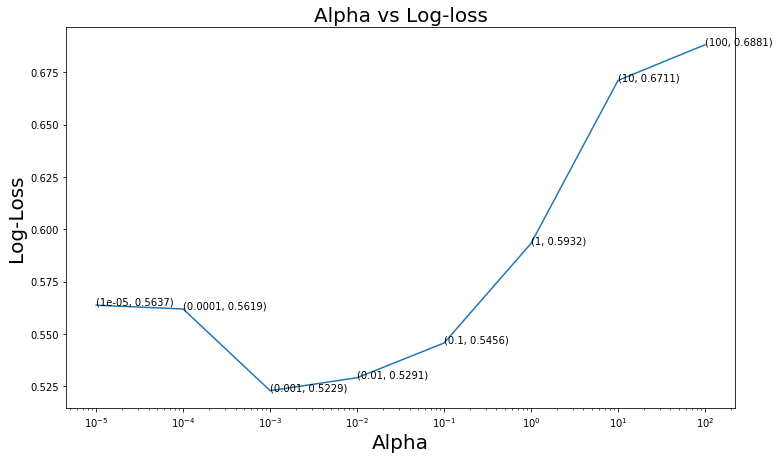

In [245]:
#predict and see confusion matrix (xgboost)
from sklearn.metrics.classification import accuracy_score, log_loss
Log_Loss = []
Accuracy_Scores = []
d_test = xgb.DMatrix(CVFinal)
LR_LogLoss = log_loss(CVFinalLabels, bst.predict(d_test))
LR_Accuracy = accuracy_score(CVFinalLabels, list(map(lambda x: int(x>0.5), bst.predict(d_test))))
print('Test LogLoss = {}, Test Accuracy Score = {}%'.format(LR_LogLoss, round((float(LR_Accuracy))*100,2)))
print_confusionMatrix(CVFinalLabels,  list(map(lambda x: int(x>0.5), bst.predict(d_test))))

Log_Loss.append(LR_LogLoss)
Accuracy_Scores.append(LR_Accuracy)

For values of best alpha = 0.001, Test LogLoss = 0.53499733298338, Test Accuracy Score = 74.5%


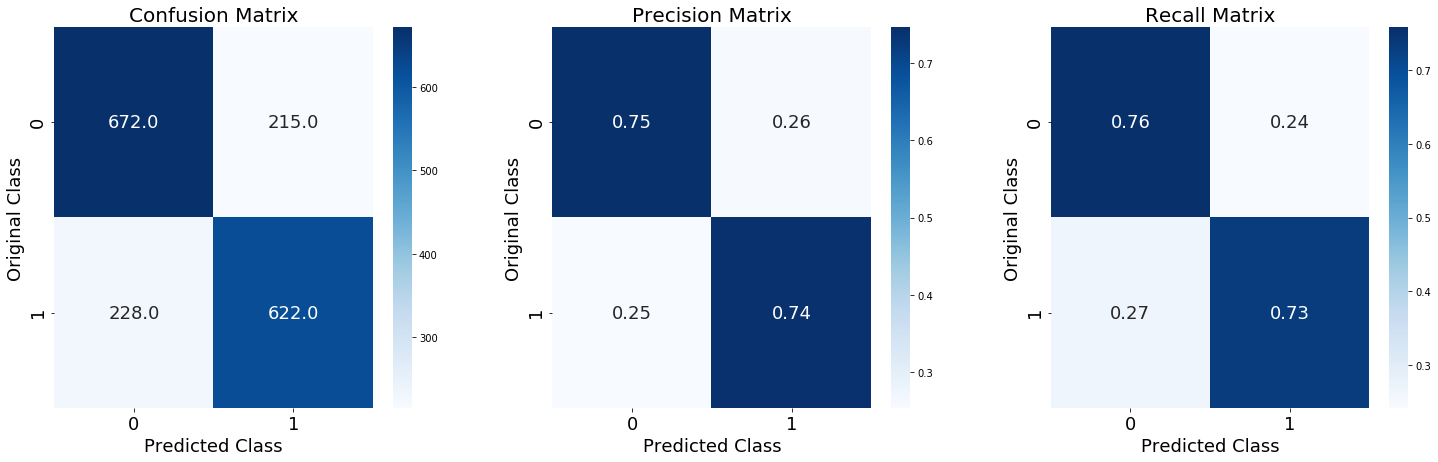

In [248]:
w2vFeaturesPredictText = create_w2v(data_predict, "Test", "text")
w2vFeaturesPredictKeyword = create_w2v(data_predict, "Test", "keyword")
w2vFeaturesPredictLocation = create_w2v(data_predict, "Test", "location") # process test data

PredictFinal = np.hstack((np.array(w2vFeaturesPredictText),
                          np.array(w2vFeaturesPredictKeyword),
                          np.array(w2vFeaturesPredictLocation)))
print("Shape of Predict Data = {}".format(PredictFinal.shape))
pickle.dump(PredictFinal, open(os.path.join(DATAPATH, 'PredictFinal.sav'), 'wb'))

In [249]:
d_test = xgb.DMatrix(PredictFinal) #predict for test data
result= pd.DataFrame({'id':data_predict['id'],
                      'target':list(map(lambda x: int(x>0.5), bst.predict(d_test)))})
result.to_csv(os.path.join(DATAPATH, 'predict.csv'), index = False)

[0]	train-logloss:0.69006	valid-logloss:0.69033
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.66243	valid-logloss:0.66594
[20]	train-logloss:0.64009	valid-logloss:0.64679
[30]	train-logloss:0.62142	valid-logloss:0.63085
[40]	train-logloss:0.60684	valid-logloss:0.61957
[50]	train-logloss:0.59409	valid-logloss:0.60931
[60]	train-logloss:0.58288	valid-logloss:0.60009
[70]	train-logloss:0.57251	valid-logloss:0.59173
[80]	train-logloss:0.56358	valid-logloss:0.58523
[90]	train-logloss:0.55491	valid-logloss:0.57844
[100]	train-logloss:0.54712	valid-logloss:0.57280
[110]	train-logloss:0.53992	valid-logloss:0.56792
[120]	train-logloss:0.53342	valid-logloss:0.56370
[130]	train-logloss:0.52720	valid-logloss:0.55940
[140]	train-logloss:0.52176	valid-logloss:0.55601
[150]	train-logloss:0.51649	valid-logloss:0.55223
[160]	train-logloss:0.51179	valid-logloss:0.54942
[170]	trai

['India']
['Delhi']


deed reason earthquak may allah forgiv us unknown us
forest fire near la rong sask canada fire canada
resid ask shelter place notifi offic evacu shelter place order expect evacu unknown loc


body bags      40
armageddon     37
harm           37
deluge         36
wrecked        36
ruin           36
siren          35
fear           35
twister        35
explode        35
panic          34
aftershock     34
screaming      34
blizzard       33
crush          33
blaze          33
sinking        33
traumatised    33
blazing        33
bloody         32
curfew         32
hellfire       32
body bag       32
upheaval       32
smoke          31
Name: keyword, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
